In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [75]:
df = pd.read_csv('archive/ifood_df.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [76]:
df.isnull().sum().sort_values(ascending=False)

Income                  0
marital_Together        0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Widow           0
Complain                0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
Z_CostContact           0
AcceptedCmp2            0
Kidhome                 0
MntGoldProds            0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
NumDealsPurchases       0
AcceptedCmp1            0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmpO

In [77]:
df = df[df['Income'] < df['Income'].quantile(0.99)]
df = df[df['Age'] < 100]

In [78]:
df['Income'].fillna(df['Income'].median(), inplace=True)
df['Income_missing'] = df['Income'].isnull().astype(int)

C:\Users\chris\AppData\Local\Temp\ipykernel_41756\1009327884.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


In [79]:
print(df.columns.tolist())

['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow', 'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall', 'Income_missing']


In [80]:
df['Income'].describe()

count     2182.000000
mean     51141.373052
std      20276.365543
min       1730.000000
25%      34946.000000
50%      50954.000000
75%      67543.500000
max      92556.000000
Name: Income, dtype: float64

c:\Users\chris\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


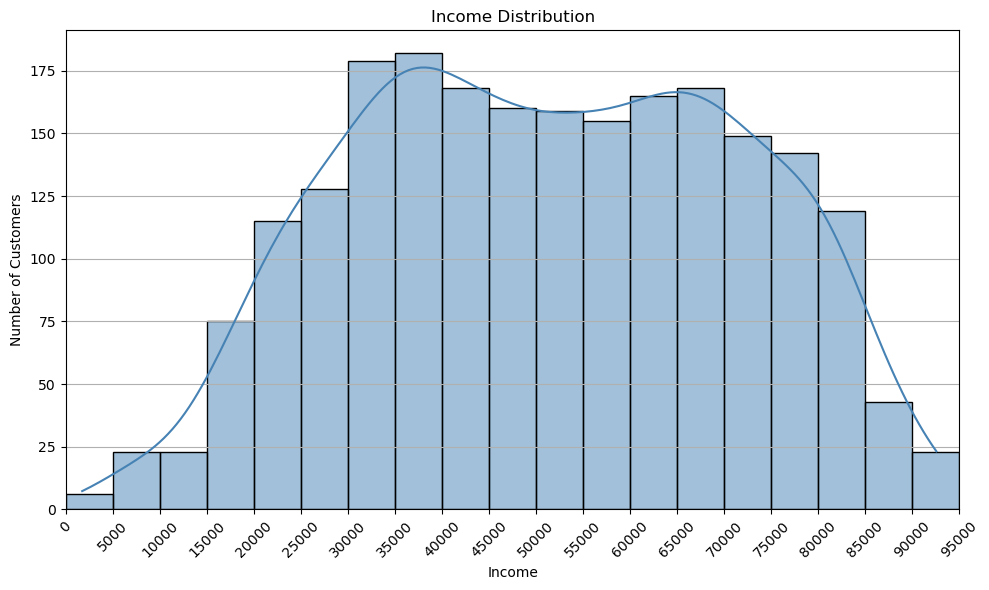

In [81]:
import seaborn as sns

# Define custom bins (5K increments)
bins = range(0, 100001, 5000)  # 0 to 100,000 in 5K steps

plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], bins=bins, kde=True, color='steelblue')
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Number of Customers")
plt.xticks(bins, rotation=45)
plt.xlim(0, 95000)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [82]:
#Income Segment
def income_segment(income):
    if income < 30000:
        return "Low Income"
    elif income <= 65000:
        return "Mid Income"
    else:
        return "High Income"

In [83]:
df['IncomeSegment'] = df['Income'].apply(income_segment)

c:\Users\chris\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Total Customer Spend Distribution')

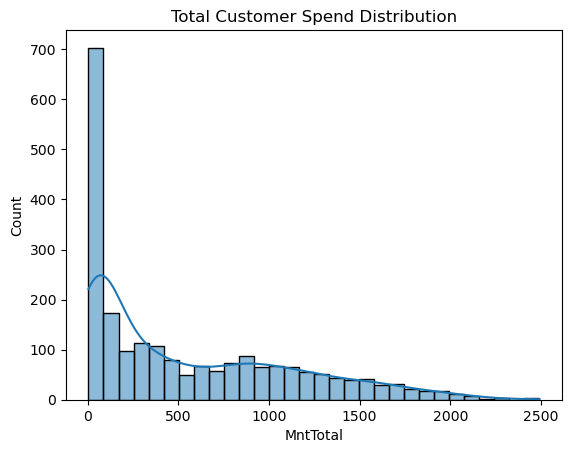

In [84]:
sns.histplot(df['MntTotal'], bins=30, kde=True)
plt.title("Total Customer Spend Distribution")

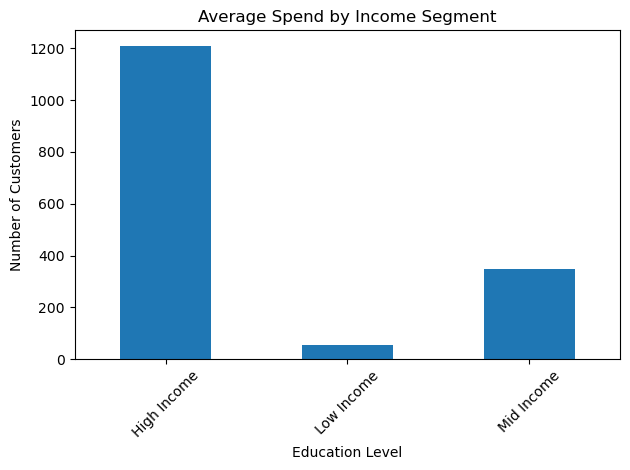

In [85]:
df.groupby('IncomeSegment')['MntTotal'].mean().plot(kind='bar')
plt.title('Average Spend by Income Segment')
plt.ylabel('Total Spend')

plt.xticks(rotation=45)
plt.xlabel("Education Level")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

In [86]:
product_cols = [
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]

df[product_cols].mean().sort_values(ascending=False)

MntWines            300.736480
MntMeatProducts     161.059120
MntGoldProds         43.756645
MntFishProducts      37.127406
MntSweetProducts     26.531164
MntFruits            26.130614
dtype: float64

In [87]:
df.groupby('IncomeSegment')[product_cols].mean().T.sort_values(
    by=['Low Income', 'Mid Income', 'High Income'], ascending=False
)


IncomeSegment,High Income,Low Income,Mid Income
MntMeatProducts,390.052795,21.462162,79.020548
MntGoldProds,70.787267,16.994595,37.330479
MntWines,617.476708,13.781081,216.997432
MntFishProducts,83.161491,8.010811,20.969178
MntSweetProducts,60.105590,6.189189,14.463185
MntFruits,57.948758,5.745946,15.044521


In [88]:
df['FavoriteProduct'] = df[product_cols].idxmax(axis=1)
ct = pd.crosstab(df['IncomeSegment'], df['FavoriteProduct'])


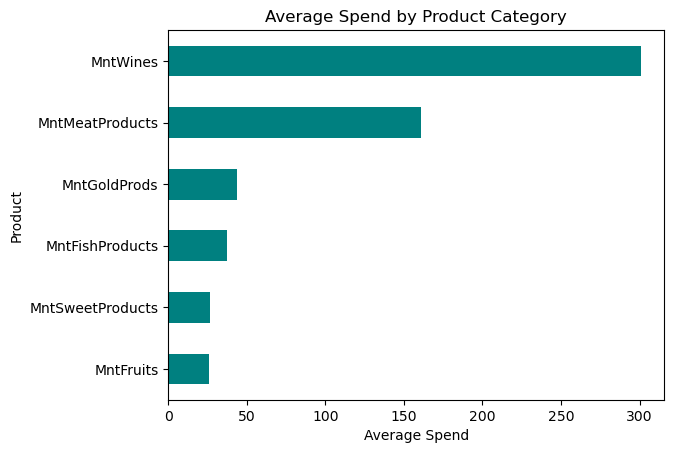

In [89]:
df[product_cols].mean().sort_values().plot(kind='barh', color='teal')
plt.title("Average Spend by Product Category")
plt.xlabel("Average Spend")
plt.ylabel("Product")
plt.show()

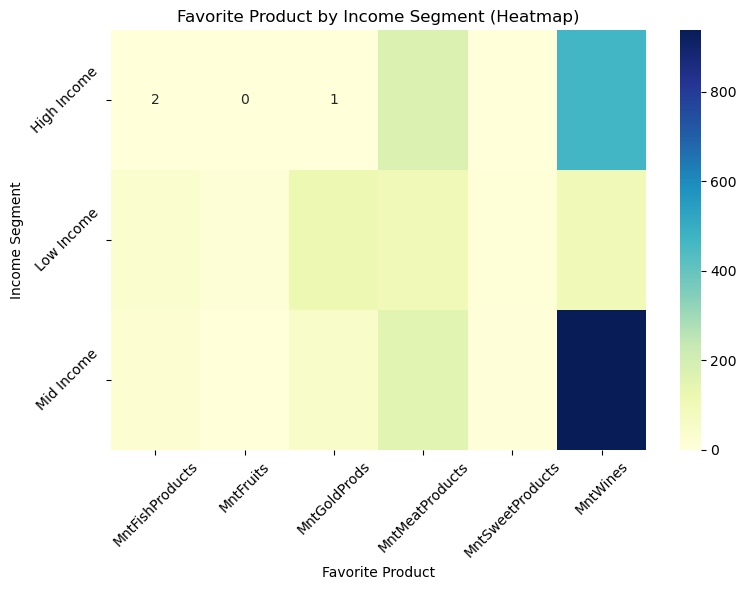

In [90]:
plt.figure(figsize=(8, 6))
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Favorite Product by Income Segment (Heatmap)")
plt.xlabel("Favorite Product")
plt.xticks(rotation=45)
plt.ylabel("Income Segment")
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

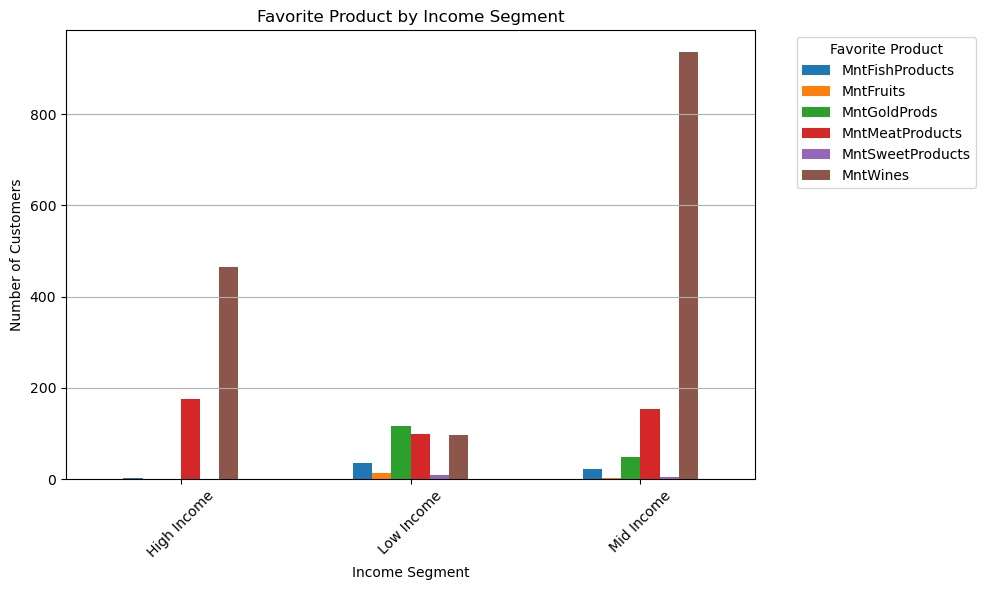

In [91]:
ct.plot(kind='bar', figsize=(10, 6))
plt.title("Favorite Product by Income Segment")
plt.xticks(rotation=45)
plt.xlabel("Income Segment")
plt.ylabel("Number of Customers")
plt.legend(title="Favorite Product", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

Text(0.5, 1.0, 'Income vs Total Spend')

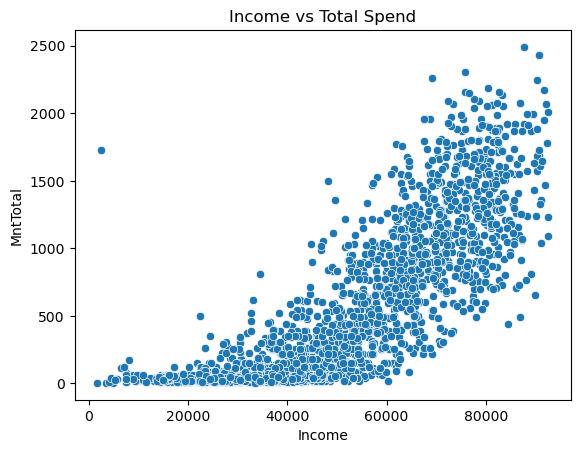

In [92]:
sns.scatterplot(x='Income', y='MntTotal', data=df)
plt.title("Income vs Total Spend")

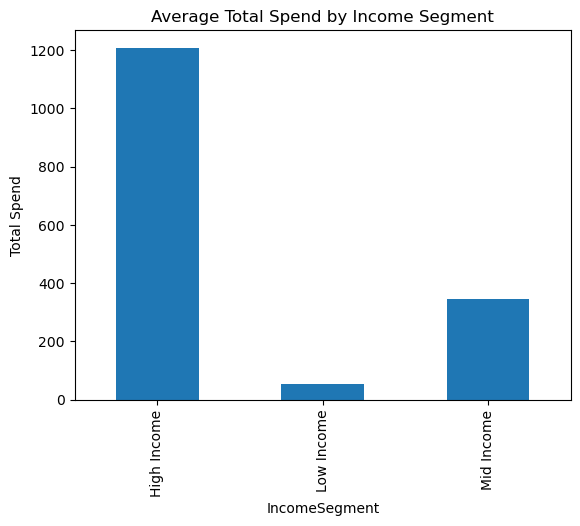

In [93]:
df.groupby('IncomeSegment')['MntTotal'].mean().plot(kind='bar')
plt.title('Average Total Spend by Income Segment')
plt.ylabel('Total Spend')
plt.show()

Text(0.5, 1.0, 'Income vs Wine')

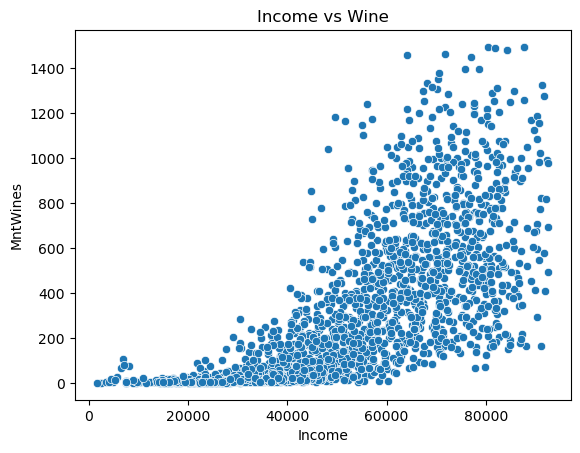

In [94]:
sns.scatterplot(x='Income', y='MntWines', data=df)
plt.title("Income vs Wine")

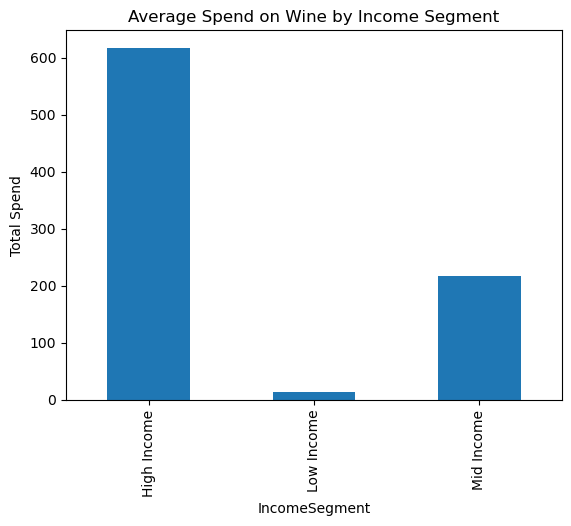

In [95]:
df.groupby('IncomeSegment')['MntWines'].mean().plot(kind='bar')
plt.title('Average Spend on Wine by Income Segment')
plt.ylabel('Total Spend')
plt.show()

Text(0.5, 1.0, 'Income vs Gold')

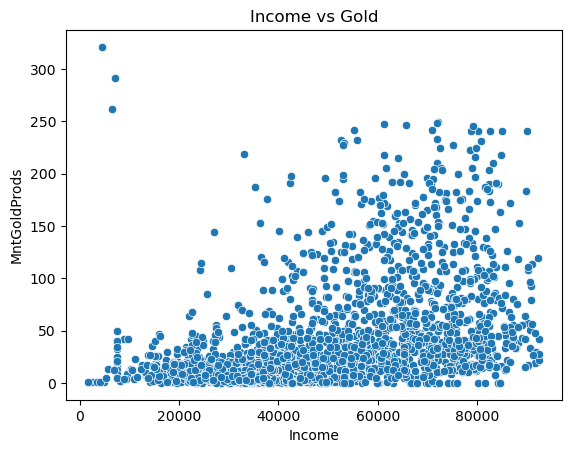

In [96]:
sns.scatterplot(x='Income', y='MntGoldProds', data=df)
plt.title("Income vs Gold")

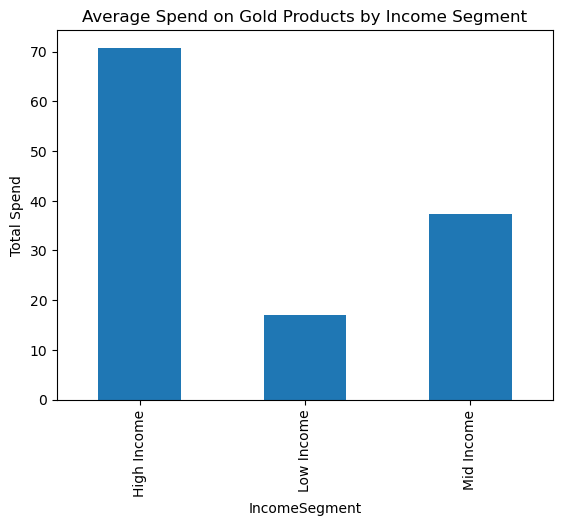

In [97]:
df.groupby('IncomeSegment')['MntGoldProds'].mean().plot(kind='bar')
plt.title('Average Spend on Gold Products by Income Segment')
plt.ylabel('Total Spend')
plt.show()

Text(0.5, 1.0, 'Income vs Fish')

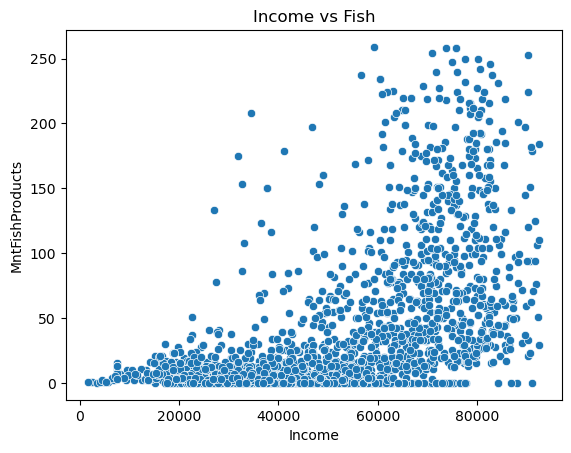

In [98]:
sns.scatterplot(x='Income', y='MntFishProducts', data=df)
plt.title("Income vs Fish")

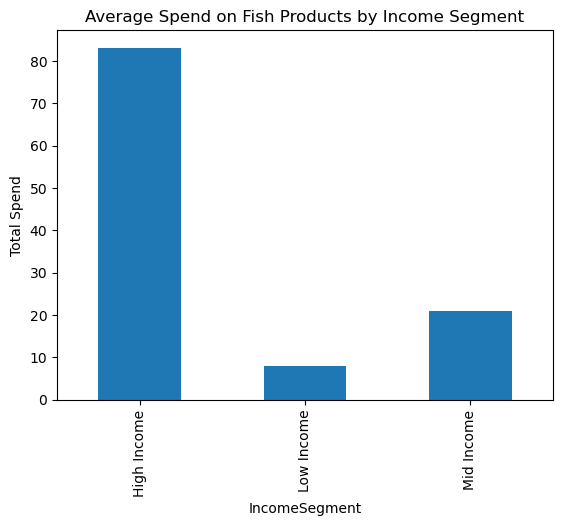

In [99]:
df.groupby('IncomeSegment')['MntFishProducts'].mean().plot(kind='bar')
plt.title('Average Spend on Fish Products by Income Segment')
plt.ylabel('Total Spend')
plt.show()

Text(0.5, 1.0, 'Income vs Fruit')

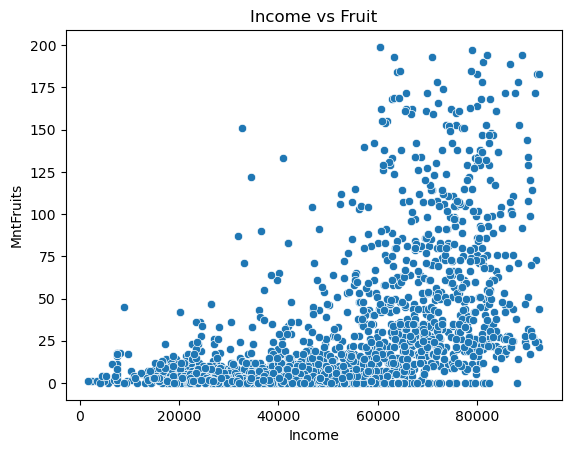

In [100]:
sns.scatterplot(x='Income', y='MntFruits', data=df)
plt.title("Income vs Fruit")

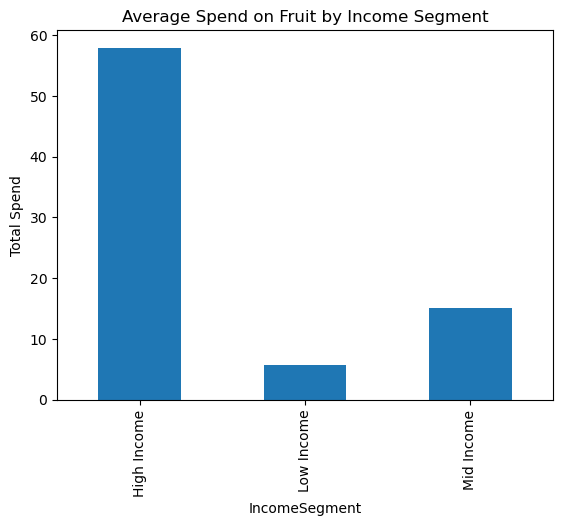

In [101]:
df.groupby('IncomeSegment')['MntFruits'].mean().plot(kind='bar')
plt.title('Average Spend on Fruit by Income Segment')
plt.ylabel('Total Spend')
plt.show()

Text(0.5, 1.0, 'Income vs Sweets')

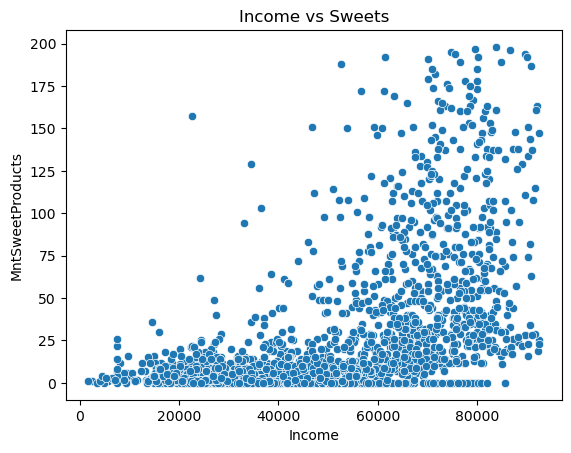

In [102]:
sns.scatterplot(x='Income', y='MntSweetProducts', data=df)
plt.title("Income vs Sweets")

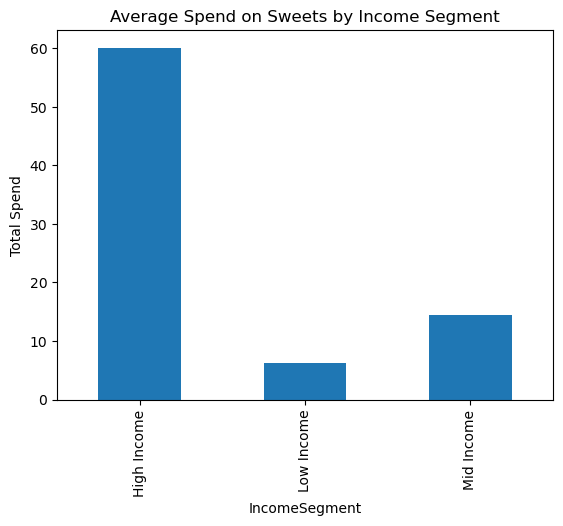

In [103]:
df.groupby('IncomeSegment')['MntSweetProducts'].mean().plot(kind='bar')
plt.title('Average Spend on Sweets by Income Segment')
plt.ylabel('Total Spend')
plt.show()

Text(0.5, 1.0, 'Income vs Meat')

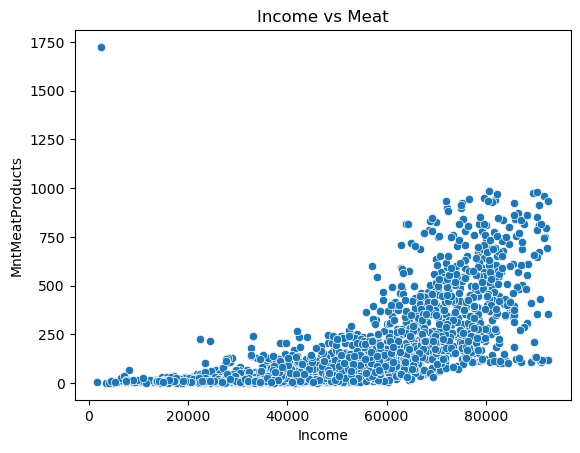

In [104]:
sns.scatterplot(x='Income', y='MntMeatProducts', data=df)
plt.title("Income vs Meat")

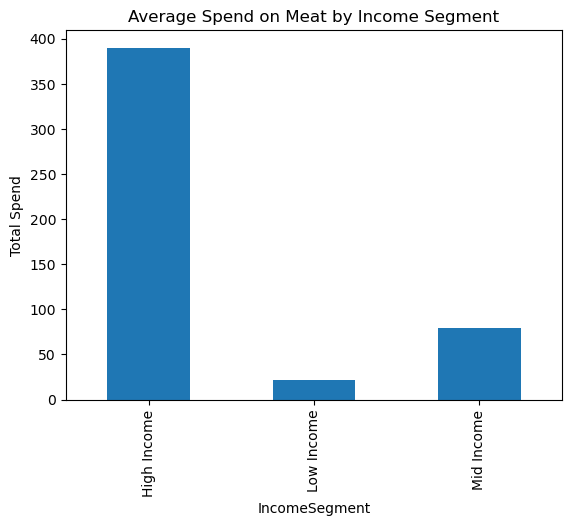

In [105]:
df.groupby('IncomeSegment')['MntMeatProducts'].mean().plot(kind='bar')
plt.title('Average Spend on Meat by Income Segment')
plt.ylabel('Total Spend')
plt.show()

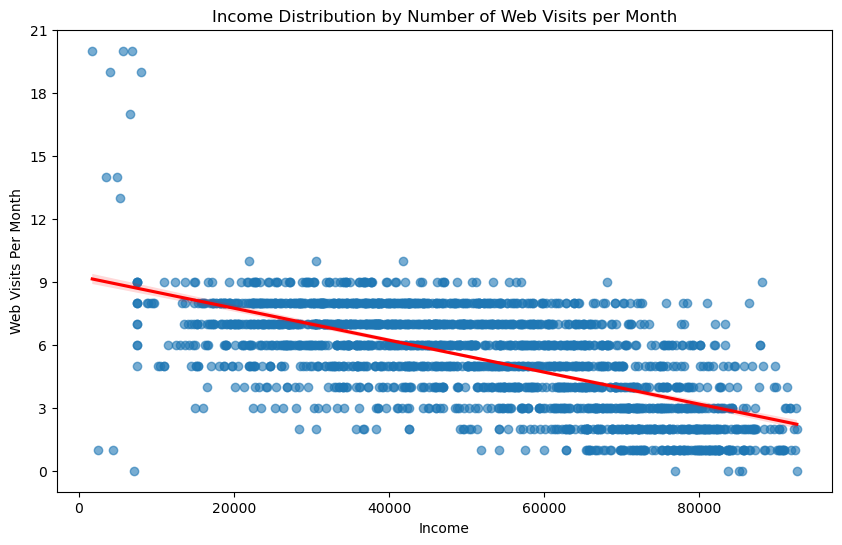

In [106]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Income', y='NumWebVisitsMonth', data=df,
            scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title("Income Distribution by Number of Web Visits per Month")
plt.ylabel("Web Visits Per Month")
plt.xlabel("Income")
# plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

In [107]:
correlation = df['Income'].corr(df['NumWebVisitsMonth'])
print(f"Correlation between Income and NumWebVisitsMonth: {correlation:.3f}")

Correlation between Income and NumWebVisitsMonth: -0.643


Text(0.5, 1.0, 'Correlation Heatmap')

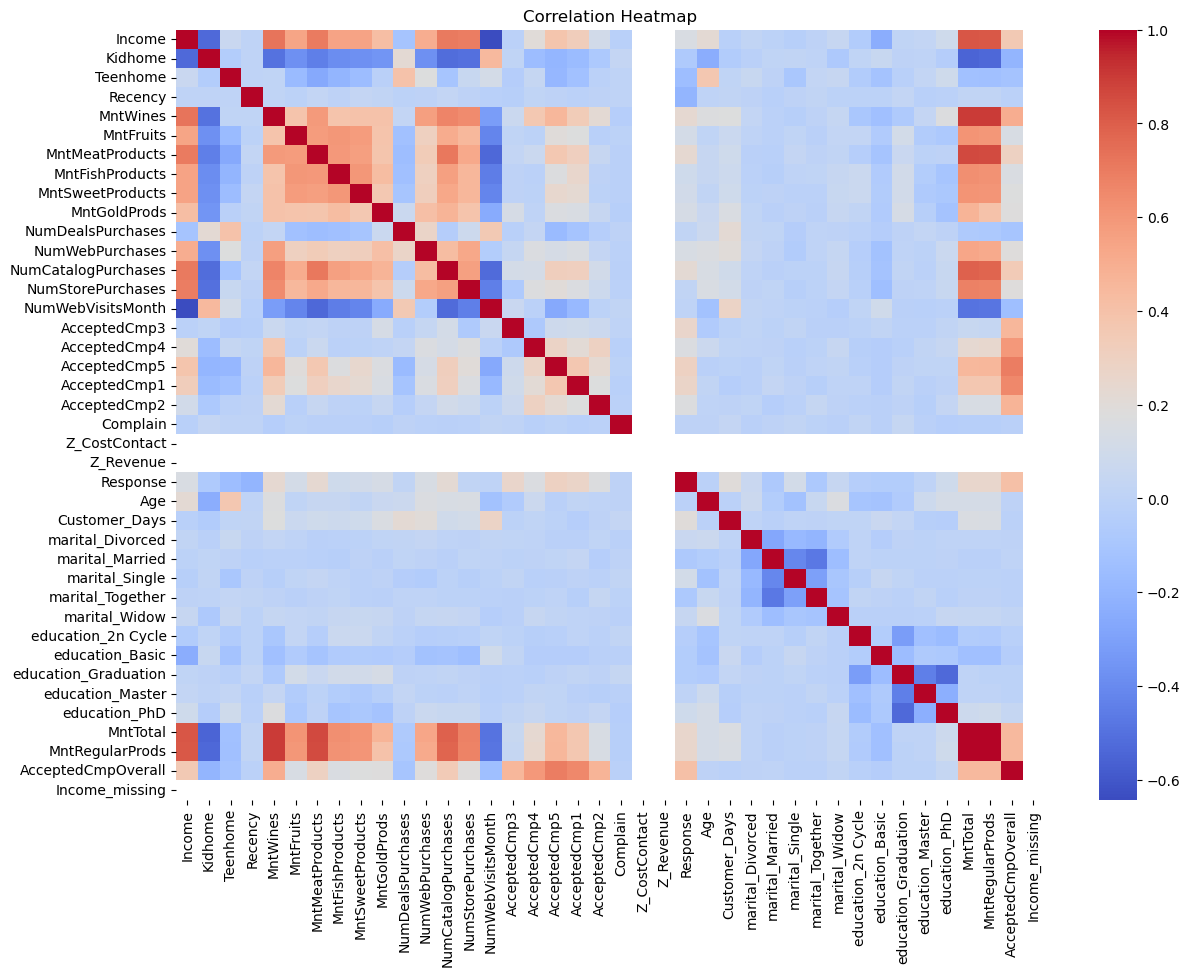

In [108]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
